# Lotka-Volterra model

Interact.Slider{Float64}(Signal{Float64}(0.5, nactions=0),"α",0.5,0.0:0.1:1.0,true)

Interact.Slider{Float64}(Signal{Float64}(0.5, nactions=0),"β",0.5,0.0:0.1:1.0,true)

Interact.Slider{Float64}(Signal{Float64}(0.5, nactions=0),"σ",0.5,0.0:0.1:1.0,true)

Interact.Slider{Float64}(Signal{Float64}(0.5, nactions=0),"γ",0.5,0.0:0.1:1.0,true)

Interact.Slider{Float64}(Signal{Float64}(2.5, nactions=0),"x0",2.5,0.0:0.1:5.0,true)

Interact.Slider{Float64}(Signal{Float64}(2.5, nactions=0),"y0",2.5,0.0:0.1:5.0,true)

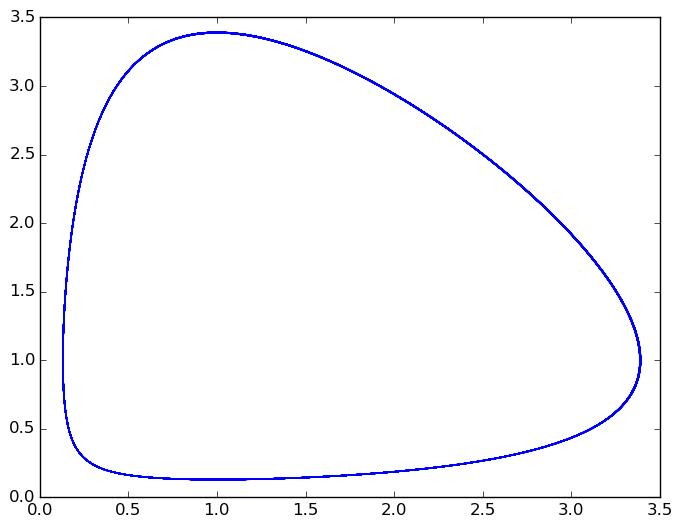

 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at ./abstractarray.jl:29
 in anonymous at In[6]:24
 in withfig at /home/fratava/.julia/v0.4/PyPlot/src/PyPlot.jl:639
 in anonymous at In[6]:9
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/fratava/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/fratava/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[6], in expression starting on line 9


In [6]:
using Interact
#using Gadfly
using ODE
using PyPlot
#using DataFrames


f = figure()
@manipulate for α=0:0.1:1.0,β=0:0.1:1.0,σ=0:0.1:1.0,γ=0:0.1:1.0,x0=0:0.1:5.0,y0=0:0.1:5.0; withfig(f) do 
    
    #α=0.1
    #β=0.1
    #σ=0.1
    #γ=0.1   
    
    
    function f(t,y)   
        ydot=similar(y)    
        ydot[1]=y[1]*(α-β*y[2]) 
        ydot[2]=-y[2]*(γ-σ*y[1])    
        ydot
    end

    t=[0:0.1:500]
    n=length(t)
    y0=[x0,y0]
    t,y=ODE.ode23s(f,y0,t)
    y1=[a[1] for a in y]
    y2=[a[2] for a in y]
    t=t[:,1]                 
    
    PyPlot.plot(y1,y2,"b-")
    #PyPlot.plot(t,y1,"g-",t,y2,"r-")    
    #Gadfly.plot(x=y1,y=y2,Geom.point,Guide.Title("Grafica de x vs y"),Theme(default_color=color("red")))
    #Gadfly.plot(x=t,y=y2,Geom.line,Guide.xlabel("t"),Guide.ylabel("x"),Guide.Title("Grafica de x vs t"),Theme(default_color=color("green"))) 
    #Gadfly.plot(x=t,y=y2,Geom.line,Guide.xlabel("t"),Guide.ylabel("y"),Guide.Title("Grafica de y vs t"),Theme(default_color=color("orange")))
    #PyPlot.show()
    
    #figure(0)


    #subplot(211)
    #PyPlot.plot(y1,y2,"b-")
    #title("xt vs t")
    #xlabel(L"$t$")
    #ylabel(L"$x_t$")
    #ylim(0,1)
    #xlim(0,length(I))
    #legend(["r=$r"])
    #legend(["x0=$x0"])
    #grid()

    #subplot(212)
    #PyPlot.plot(t,y1,"g-",t,y2,"b-")
    #suptitle("Combinado")
    #title(L"$Cobweb$")
    #xlabel(L"$x_k$")
    #ylabel(L"$x_k+1$")
    #ylim(0,1.0)
    #legend(["r=$r"])
    #legend(["x0=$x0"])
    #grid()

    #savefig("Combinado.pdf",dpi=100,format="PDF")

    #show()
    
    
        end   
end